<a href="https://colab.research.google.com/github/guangyoung/test2/blob/main/test_engine_QG_NP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

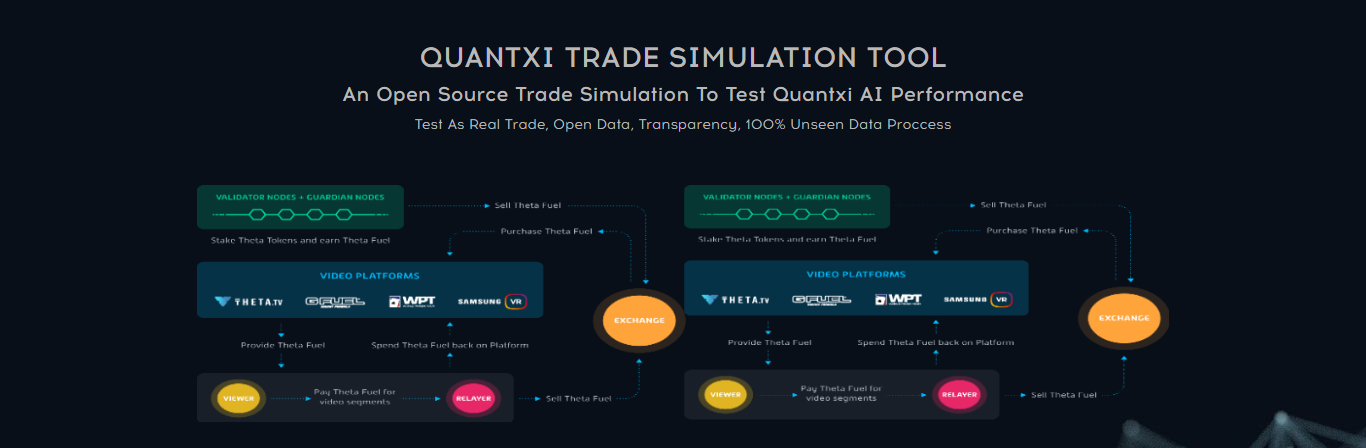

# **LIBRARY**

In [2]:
!pip install yfinance
!pip install pandas_datareader
!pip install uvloop
!pip install aiohttp[speedups]

import getpass
import pandas as pd
import yfinance as yf
import datetime
import requests
import datetime as dt
import numpy as np
from pandas_datareader import data as pdr
import sys
import ipywidgets as widgets
import time
import json
import random
import statistics
import math
import aiohttp
import asyncio
import urllib3



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 kB 17.4 MB/s eta 0:00:00


In [3]:
http = urllib3.PoolManager()

# **QZ** **API** **KEY**

In [4]:
api_key = widgets.Password(value='',placeholder='Enter QZ API Key',description='QZ API Key:',disabled=False)
api_key

Password(description='QZ API Key:', placeholder='Enter QZ API Key')

In [ ]:
async def addData(datainput):
    async with aiohttp.ClientSession() as session:
        async with session.post("http://api.quantgenius.ai/add", headers = {'X-API-KEY':api_key.value, 'Content-Type': 'application/json'}, data = datainput) as resp:
             return await resp.text()

In [16]:
async def resetData(url,api):
    async with aiohttp.ClientSession() as session:
        async with session.delete(url, headers = {'APIKEY':api}) as resp:
             return await resp.text()

In [18]:
result = await resetData("https://api.quantgenius.ai/reset",api_key.value)
res = json.loads(result)
print(res)

{'status': 'Success', 'message': 'Your data has been successfully reset'}


In [55]:
#ini request check ip http://api.quantgenius.ai/getUser..untuk api reset ganti jd resetData, untuk add jadi addData
response = requests.delete("https://api.quantgenius.ai/reset", headers = {"APIKEY":api_key.value})
print(response.json()['status'],"--",response.json()['message'])

Success -- Your data has been successfully reset


# **TEST SETTING**

In [7]:
initial_equity = widgets.BoundedFloatText(value=1000000.0,min=1000000.0,max=1000000000.0,step=100000,description='Initial Equity :')
spread = widgets.BoundedFloatText(value=0.001,min=0.0,max=0.01,step=0.001,description='Spread :')
commission = widgets.BoundedFloatText(value=0.001,min=0.0,max=0.01,step=0.001,description='Commision :')
interest_rate = widgets.BoundedFloatText(value=0.03,min=0.0,max=0.1,step=0.001,description='Interest Rate :')
regT_margin_rate = widgets.BoundedFloatText(value=0.5,min=0.0,max=0.5,step=0.001,description='RegT Margin :')
maintenance_margin_rate = widgets.BoundedFloatText(value=0.25,min=0.0,max=0.25,step=0.001,description='Maint. Margin :')
#SETTING SLIPPAGE
#SETTING SUFFICIENT LIQUIDITY

widgets.HBox([widgets.VBox([initial_equity, spread, commission, interest_rate, regT_margin_rate, maintenance_margin_rate])])

# **TEST** **DATA**

In [8]:
#add data stock
portfolioTicker = []
portfolioData = []
while len(portfolioTicker) < 30:
  print("Portfolio anda masih kurang",30-len(portfolioTicker),"ticker. Mohon isi ticker pilihan anda")
  tickerSelect = list(map(str, input().split(",")))
  for i in range(30-len(portfolioTicker)):
    tickerSelect_data = yf.Ticker(tickerSelect[i]).history(period="max")#INI BISA PAKAI SUMBER DATA MANAPUN TIDAK HARUS YFINANCE
    tickerSelect_data.index = pd.to_datetime(tickerSelect_data.index).date
    if len(tickerSelect_data) > 1000:
      portfolioTicker.append(tickerSelect[i])
      portfolioData.append(tickerSelect_data)

#cleaning and rekonstruk test data
testStartdate = dt.datetime(1900, 1, 1).date()
testEnddate = dt.datetime.now().date()
for i in range(len(portfolioData)):
   testStartdate = max(testStartdate,portfolioData[i].index.min())
   testEnddate = min(testEnddate,portfolioData[i].index.max())

for i in range(len(portfolioData)):
   while not testStartdate in portfolioData[i].index:#INI DI UJI LAGI, CODING INI SDH BENER ATAU TDK
    testStartdate += datetime.timedelta(days=1)

testDate = testStartdate
date = []
data = []
while testDate < testEnddate:
  data_array = []
  for i in range(len(portfolioData)):
    if testDate in portfolioData[i].index:#INI DI CEK DAN PASTIKAN LAGI
      data_array.append(portfolioData[i]["Close"].loc[testDate])
    else:
      data_array.append(data[len(data)-1][i])
  date.append(testDate)
  data.append(data_array)

  testDate += datetime.timedelta(days=1)

test_data = pd.DataFrame(data,index=date)
dataHarga = test_data.to_numpy()
tanggal = test_data.index.to_numpy()
print("Your Portfolio Ticker:",portfolioTicker)
print("Your Portfolio Data:\n",test_data)

Portfolio anda masih kurang 30 ticker. Mohon isi ticker pilihan anda
083650.KQ,33J.BE,CMU,GQN2.SG,QIN.HM,SIX2.DE,FLU.VI,GEOS,AARVEEDEN.NS,ACJ.MU,PHAL.ST,TTNP,ALLCARGO.BO,ABAN.NS,UOF.SG,CALM,ANP.L,CTO,TX,ICIL.NS,ACGL,TZN.AX,CAT,KLR.L,D05.SI,2360.TW,XXT.SG,MVF,NRC.OL,DF.TO,AYCES.IS,SNHO,LLY.DE,AG8.MU,JE9N.F,001680.KS,SKF-A.ST,WIE.VI,119650.KS,NNIC.F,SIA1.F,CEVI.ST,ARI,PRIM,SULI.JK,MUM.F,AGV.MU,JENBURPH.BO,IZ1.SG,CPT,RATO-B.ST,JMX.BE,PBHC,7086.KL,OCI1.MU,AFA.AX,ATS.L,AC8.F,ANDHRACEMT.BO,BKSW.JK


ERROR:yfinance:$33J.BE: possibly delisted; no timezone found


Portfolio anda masih kurang 1 ticker. Mohon isi ticker pilihan anda
083650.KQ,33J.BE,CMU,GQN2.SG,QIN.HM,SIX2.DE,FLU.VI,GEOS,AARVEEDEN.NS,ACJ.MU,PHAL.ST,TTNP,ALLCARGO.BO,ABAN.NS,UOF.SG,CALM,ANP.L,CTO,TX,ICIL.NS,ACGL,TZN.AX,CAT,KLR.L,D05.SI,2360.TW,XXT.SG,MVF,NRC.OL,DF.TO,AYCES.IS,SNHO,LLY.DE,AG8.MU,JE9N.F,001680.KS,SKF-A.ST,WIE.VI,119650.KS,NNIC.F,SIA1.F,CEVI.ST,ARI,PRIM,SULI.JK,MUM.F,AGV.MU,JENBURPH.BO,IZ1.SG,CPT,RATO-B.ST,JMX.BE,PBHC,7086.KL,OCI1.MU,AFA.AX,ATS.L,AC8.F,ANDHRACEMT.BO,BKSW.JK
Your Portfolio Ticker: ['083650.KQ', 'CMU', 'GQN2.SG', 'QIN.HM', 'SIX2.DE', 'FLU.VI', 'GEOS', 'AARVEEDEN.NS', 'ACJ.MU', 'PHAL.ST', 'TTNP', 'ALLCARGO.BO', 'ABAN.NS', 'UOF.SG', 'CALM', 'ANP.L', 'CTO', 'TX', 'ICIL.NS', 'ACGL', 'TZN.AX', 'CAT', 'KLR.L', 'D05.SI', '2360.TW', 'XXT.SG', 'MVF', 'NRC.OL', 'DF.TO', '083650.KQ']
Your Portfolio Data:
                       0         1          2         3          4          5   \
2010-07-06  10113.392578  1.978178   2.329596  0.000002   6.610753   7.876718   


# **RUN** **TEST**

In [19]:
stock_price = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype='d')
stock_position_size = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype='d')
filledOrder = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype='d')
filledPrice = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype='d')
initial_stockPrice = np.array(dataHarga[0], dtype='d')
cash_balance = initial_equity.value
quantxi_equity_array = np.array([], dtype='d')
buyhold_equity_array = np.array([], dtype='d')
excessLiquidity_array = np.array([], dtype='d')
previous_signal_hashcode = "0000000000000000000000000000000000000000000000000000000000000000"
dataIdx = 0
accrued_interest = 0
min_excessLiquidity = initial_equity.value

while dataIdx < 259:

    stock_price = dataHarga[dataIdx]

    if cash_balance < 0:
        daily_Interest = cash_balance * (interest_rate.value / 360) * (tanggal[dataIdx]-tanggal[dataIdx-1]).days#ini nanti ganti jadi 1
        accrued_interest += daily_Interest

    if tanggal[dataIdx].day == 1:
        cash_balance += accrued_interest
        accrued_interest = 0

    market_value = np.sum(stock_price * stock_position_size)
    equity_with_loanValue = cash_balance + accrued_interest + market_value

    data_input = {
                    "previousSignalHashcode": previous_signal_hashcode,
                    "equityBalance": equity_with_loanValue,
                    "portfolio":{
                        "assetPrice": stock_price.tolist(),
                        "positionSize": stock_position_size.tolist()
                    }
                }

    #response = http.request('GET', 'https://example.com', headers={
    response = http.request("POST", "https://api.quantgenius.ai/add", headers = {"APIKEY":api_key.value, "Content-Type": 'application/json'}, json = data_input)
    # response = await addData(json.dumps(data_input))
    # res = json.loads(response)
    # print(json.loads(response.data))
    # response = requests.post("https://api.quantgenius.ai/add", headers = {"X-API-KEY":api_key.value, "Content-Type": 'application/json'}, data = json.dumps(data_input))

    signal_output = response.json()["data"]#json.loads(response.data)["data"]#INI DIPIKIRIN JIKA STATUS SIGNAL TIDAK SUCCESS, KADANG MUNCUL KEY ERROR DATA, yg artinya key nya bisa jd message, ada error saat rest api

    previous_signal_hashcode = signal_output["signalHashcode"]

    # ----------------------------------------------------------------------------------
    # TRADE TRANSACTION ================================================================
    # ----------------------------------------------------------------------------------
    #tentukan harga eksekusi+slippage
    #tentukan sufficient liquidity

    market_value = np.sum(stock_price * stock_position_size)
    equity_with_loanValue = cash_balance + accrued_interest + market_value
    maintenance_margin_req = market_value * maintenance_margin_rate.value
    excess_liquidity = equity_with_loanValue - maintenance_margin_req

    if excess_liquidity > 0:
        regT_margin_req = market_value * regT_margin_rate.value
        excess_equity = equity_with_loanValue - regT_margin_req

        estimate_imr = np.sum(signal_output["tradeSignal"] * stock_price) * regT_margin_rate.value
        estimate_comm = np.sum(abs(signal_output["tradeSignal"] * stock_price)) * (commission.value + spread.value)

        filled_percentage = 0
        if (estimate_imr+estimate_comm) <= 0:
            filled_percentage = 1
        elif excess_equity<= 0:
            filled_percentage = 0
        elif excess_equity > (estimate_imr+estimate_comm):
            filled_percentage = 1
        else:
            filled_percentage = excess_equity/(estimate_imr+estimate_comm)

        for i in range(30):#PAKAI METODE LOOPING TERCEPAT
            filledOrder[i] = signal_output["tradeSignal"][i] * filled_percentage
            filledPrice[i] = stock_price[i]

        total_trade_value = np.sum(filledOrder * filledPrice)
        total_commission = np.sum(abs(filledOrder * filledPrice)) * (commission.value + spread.value)
        cash_balance -= total_trade_value + total_commission
        stock_position_size += filledOrder

    #equity comparison
    quantxi_equity = equity_with_loanValue
    quantxi_equity_array = np.append(quantxi_equity_array, quantxi_equity)
    excessLiquidity_array = np.append(excessLiquidity_array, excess_liquidity)

    buyhold_equity = 0
    for i in range(30):
        buyhold_equity += (initial_equity.value / 30 / initial_stockPrice[i]) * stock_price[i]
    buyhold_equity_array = np.append(buyhold_equity_array, buyhold_equity)

    #total return comparison
    quantxi_total_return = (quantxi_equity - initial_equity.value) / initial_equity.value
    buyhold_total_return = (buyhold_equity - initial_equity.value) / initial_equity.value

    if excess_liquidity < min_excessLiquidity:
        min_excessLiquidity = excess_liquidity;

    dataIdx += 1
    # print(dataIdx)

print(equity_with_loanValue / buyhold_equity)
print(equity_with_loanValue)
print(buyhold_equity)
print(min_excessLiquidity)
print(dataIdx)


1.0284936135150817
1111932.853287728
1081127.6207029386
503746.2200864499
259


# **TEST** **RESULT**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import StepPatch

np.random.seed(0)
h, edges = np.histogram(np.random.normal(5, 3, 5000),
                        bins=np.linspace(0, 10, 20))

fig, axs = plt.subplots(3, 1, figsize=(7, 15))
axs[0].stairs(h, edges, label='Simple histogram')
axs[0].stairs(h, edges + 5, baseline=50, label='Modified baseline')
axs[0].stairs(h, edges + 10, baseline=None, label='No edges')
axs[0].set_title("Step Histograms")

axs[1].stairs(np.arange(1, 6, 1), fill=True,
              label='Filled histogram\nw/ automatic edges')
axs[1].stairs(np.arange(1, 6, 1)*0.3, np.arange(2, 8, 1),
              orientation='horizontal', hatch='//',
              label='Hatched histogram\nw/ horizontal orientation')
axs[1].set_title("Filled histogram")

patch = StepPatch(values=[1, 2, 3, 2, 1],
                  edges=range(1, 7),
                  label=('Patch derived underlying object\n'
                         'with default edge/facecolor behaviour'))
axs[2].add_patch(patch)
axs[2].set_xlim(0, 7)
axs[2].set_ylim(-1, 5)
axs[2].set_title("StepPatch artist")

for ax in axs:
    ax.legend()
plt.show()